# Task 1: Retrieving and Preparing the data

In [1]:
# import the required packages
import glob
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [3]:
# set the folder path of the csv files
path = r'C:\Users\wmayne\Uni - Jupyter\Assignment2\data' 

# create a list consisting of all the csv files in the target folder 
all_files = glob.glob(path + "/*.csv")

# instantiate an empty list object
li = []

# using a for loop, read in each of the csv files in the folder, add a new column identifying the participant number, then append the object to the list 
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=None)
    participant = os.path.splitext(os.path.basename(filename))[0]
    df.insert(loc=0,column='participant',value=participant)
    li.append(df)

# concatenate the files into one
frame = pd.concat(li, axis=0, ignore_index=True)

# add new column names to the dataframe
frame.columns = ['participant','seq','x','y','z','label']


In [4]:
# get a feel for the dataset using the head() function
frame.head()

,participant,seq,x,y,z,label
0,1,0.0,1502,2215,2153,1
1,1,1.0,1667,2072,2047,1
2,1,2.0,1611,1957,1906,1
3,1,3.0,1601,1939,1831,1
4,1,4.0,1643,1965,1879,1


In [5]:
# as per the data retrieval step we will check the data types of the series in the dataframe
frame.dtypes

participant     object
seq            float64
x                int64
y                int64
z                int64
label            int64
dtype: object

In [6]:
# update dataframe series to appropriate data types
convert_dtypes = {'participant':'category', 
                    'seq':'int64',
                    'label':'category'
                 } 
frame = frame.astype(convert_dtypes) 

In [7]:
# locate any rows containing null values
is_NaN = frame.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = frame[row_has_NaN]

# print results
print(rows_with_NaN)

Empty DataFrame
Columns: [participant, seq, x, y, z, label]
Index: []


In [8]:
# create a frequency table for each of the categorical series
frame['label'].value_counts(dropna=False).sort_index()

0      3719
1    608667
2     47878
3    216737
4    357064
5     51498
6     47770
7    593563
Name: label, dtype: int64

In [9]:
# remove all rows where label equals '0'
filter = frame[frame['label'] == 0 ].index
frame.drop(filter, inplace=True)

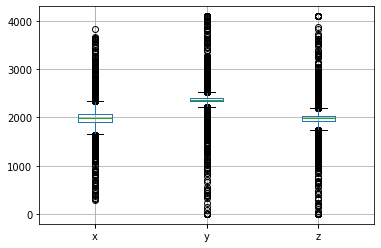

In [10]:
# visualise the integer columns of the dataframe as a sanity check
frame.boxplot(column=['x','y','z'])

# visualise the integer columns of the dataframe without outliers
frame.boxplot(column=['x','y','z'], showfliers=False)

# Task 2: Data Exploration

In [11]:
# find the shape of the prepared dataframe
frame.shape

(1923177, 6)

In [12]:
# get a list of summary statistics for the dataframe
round(frame.describe())

,seq,x,y,z
count,1923177.0,1923177.0,1923177.0,1923177.0
mean,67156.0,1987.0,2382.0,1970.0
std,41483.0,111.0,100.0,94.0
min,0.0,282.0,2.0,1.0
25%,32052.0,1904.0,2337.0,1918.0
50%,64334.0,1992.0,2367.0,1988.0
75%,98440.0,2076.0,2412.0,2032.0
max,166740.0,3828.0,4095.0,4095.0


Text(0, 0.5, 'frequency')

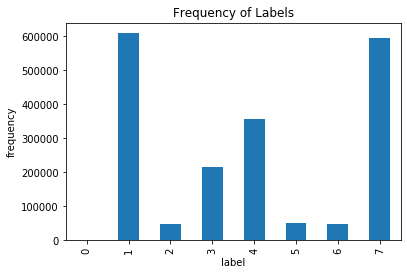

In [13]:
# create a bar chart of the frequency counts of each label
ax = frame['label'].value_counts().sort_index().plot(kind='bar',title='Frequency of Labels')
ax.set_xlabel("label")
ax.set_ylabel("frequency")

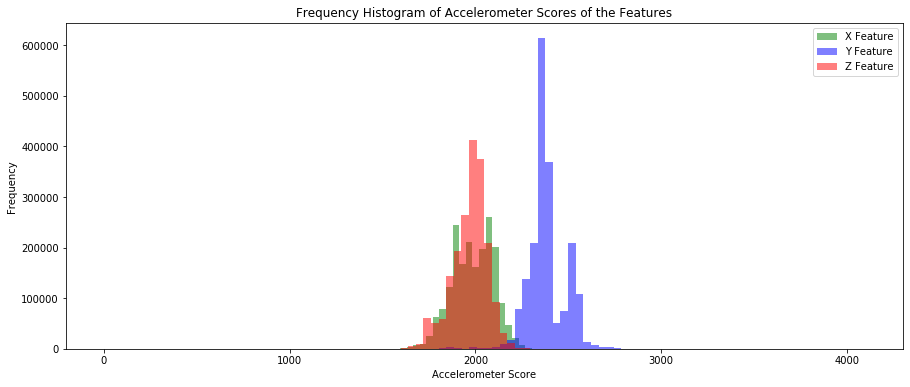

In [14]:
# plot a frequency histogram of each of the features overlayed
kwargs = dict(alpha=0.5, bins=100)
plt.figure(1, figsize=(15, 6))
plt.hist(frame['x'], **kwargs, color='g', label='X Feature')
plt.hist(frame['y'], **kwargs, color='b', label='Y Feature')
plt.hist(frame['z'], **kwargs, color='r', label='Z Feature')
plt.gca().set(title='Frequency Histogram of Accelerometer Scores of the Features', ylabel='Frequency', xlabel='Accelerometer Score')
plt.legend();

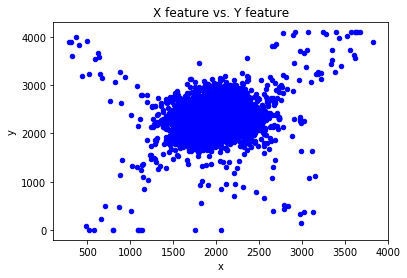

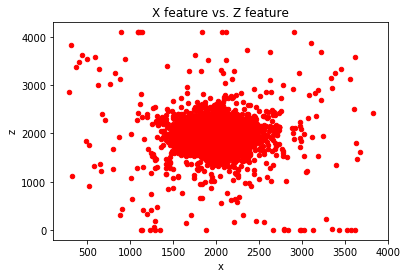

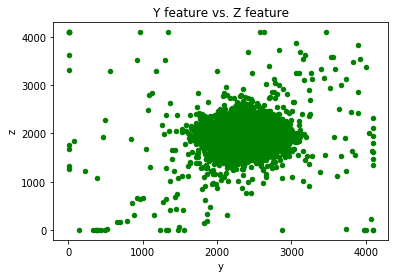

In [15]:
# plot each feature against each other as scatter plots
frame.plot.scatter(x='x',
                   y='y',title='X feature vs. Y feature',color='b')
frame.plot.scatter(x='x',
                  y='z',title='X feature vs. Z feature',color='r')
frame.plot.scatter(x='y',
                 y='z',title='Y feature vs. Z feature',color='g')

In [16]:
# create a new filtered dataframe for each participant number
p1 = frame.loc[frame.participant=='1']
p2 = frame.loc[frame.participant=='2']
p3 = frame.loc[frame.participant=='3']
p4 = frame.loc[frame.participant=='4']
p5 = frame.loc[frame.participant=='5']
p6 = frame.loc[frame.participant=='6']
p7 = frame.loc[frame.participant=='7']
p8 = frame.loc[frame.participant=='8']
p9 = frame.loc[frame.participant=='9']
p10 = frame.loc[frame.participant=='10']
p11 = frame.loc[frame.participant=='11']
p12 = frame.loc[frame.participant=='12']
p13 = frame.loc[frame.participant=='13']
p14 = frame.loc[frame.participant=='14']
p15 = frame.loc[frame.participant=='15']

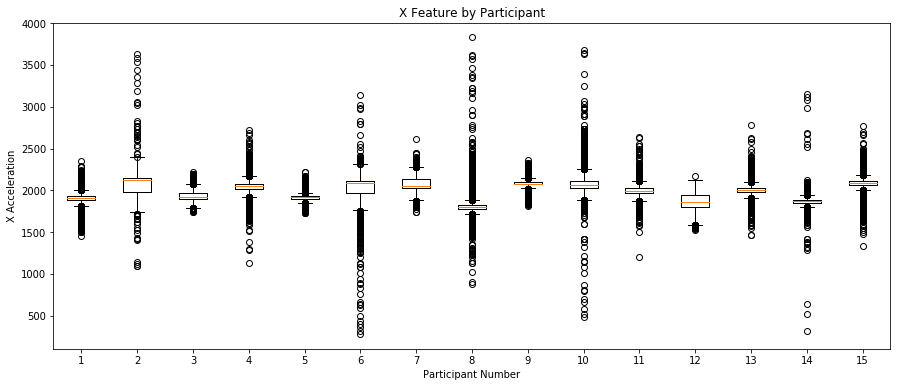

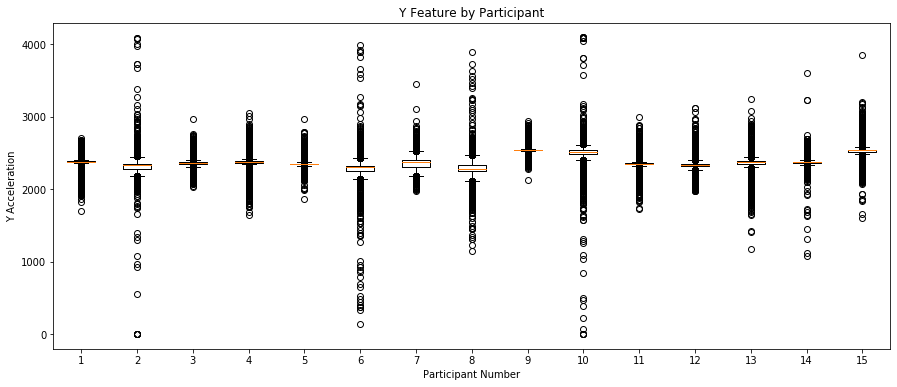

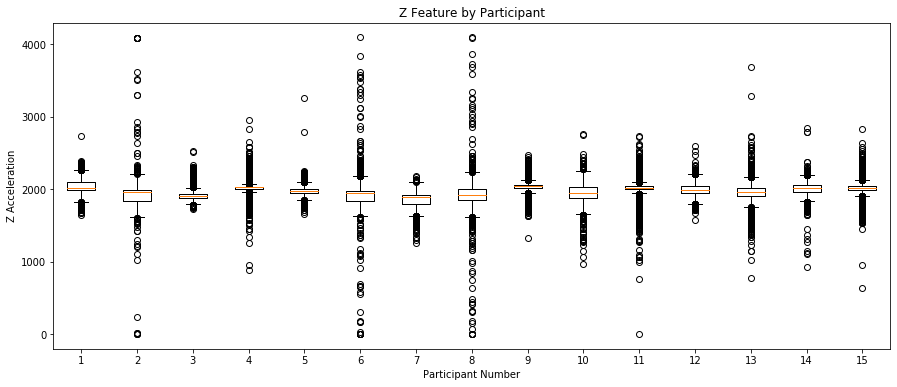

In [17]:
# create a list of series 'x', grouped by participant number
x_plots = [
    p1['x'],p2['x'],p3['x'],p4['x'],p5['x'],p6['x'],p7['x'],p8['x'],p9['x'],p10['x'],p11['x'],p12['x'],p13['x'],p14['x'],p15['x']
               ]
y_plots = [
    p1['y'],p2['y'],p3['y'],p4['y'],p5['y'],p6['y'],p7['y'],p8['y'],p9['y'],p10['y'],p11['y'],p12['y'],p13['y'],p14['y'],p15['y']
               ]
z_plots = [
    p1['z'],p2['z'],p3['z'],p4['z'],p5['z'],p6['z'],p7['z'],p8['z'],p9['z'],p10['z'],p11['z'],p12['z'],p13['z'],p14['z'],p15['z']
               ]

# Create a figure instance
fig = plt.figure(1, figsize=(15, 6))
fig2 = plt.figure(2, figsize=(15, 6))
fig3 = plt.figure(3, figsize=(15, 6))

# Create an axes instance
ax = fig.add_subplot(111)
ax.set_xlabel("Participant Number")
ax.set_ylabel("X Acceleration")
ax.set_title('X Feature by Participant')

ax2 = fig2.add_subplot(111)
ax2.set_xlabel("Participant Number")
ax2.set_ylabel("Y Acceleration")
ax2.set_title('Y Feature by Participant')

ax3 = fig3.add_subplot(111)
ax3.set_xlabel("Participant Number")
ax3.set_ylabel("Z Acceleration")
ax3.set_title('Z Feature by Participant')

# Create the boxplot
bp = ax.boxplot(x_plots)
bp2 = ax2.boxplot(y_plots)
bp3 = ax3.boxplot(z_plots)


In [18]:
# create a new filtered dataframe for each label
p1 = frame.loc[frame.label==1]
p2 = frame.loc[frame.label==2]
p3 = frame.loc[frame.label==3]
p4 = frame.loc[frame.label==4]
p5 = frame.loc[frame.label==5]
p6 = frame.loc[frame.label==6]
p7 = frame.loc[frame.label==7]

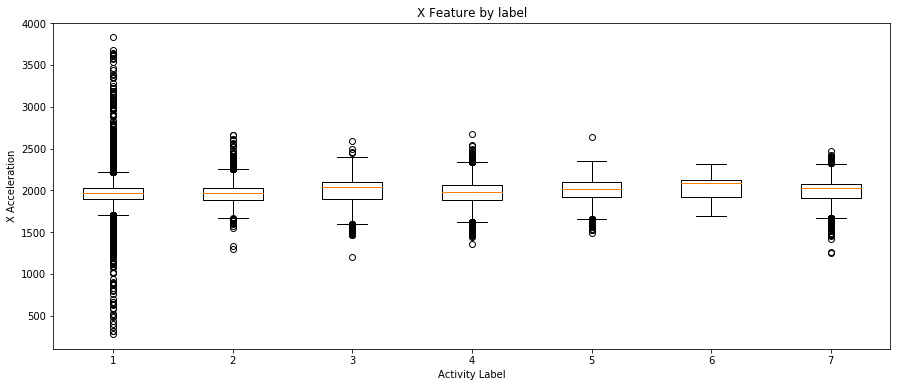

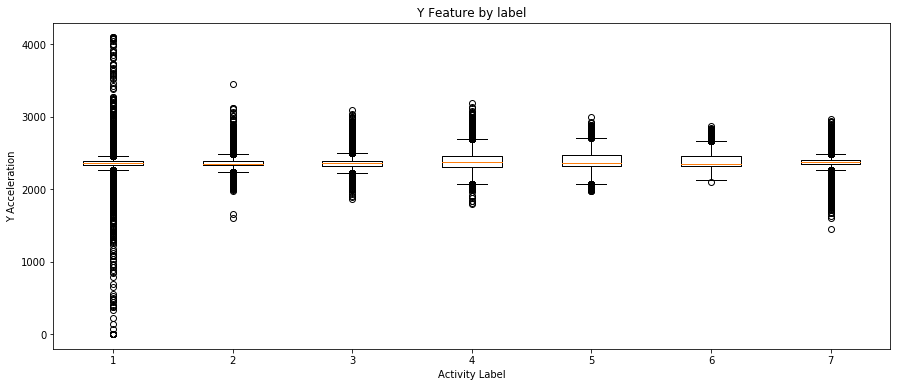

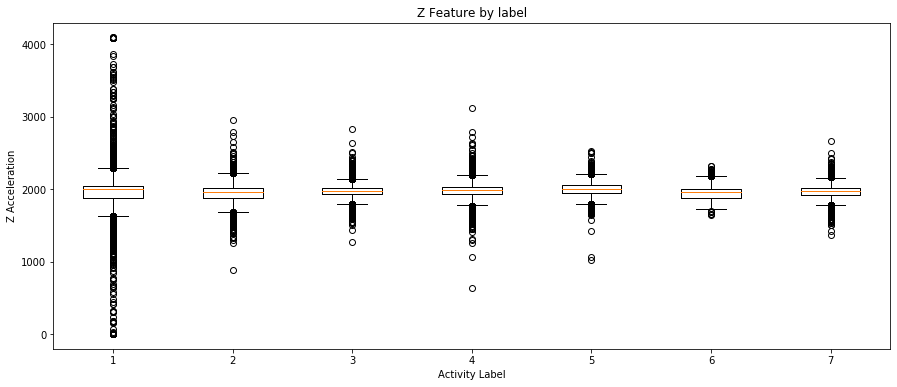

In [19]:
# create a list of series for each feature, grouped by label number
x_plots = [p1['x'],p2['x'],p3['x'],p4['x'],p5['x'],p6['x'],p7['x']]
y_plots = [p1['y'],p2['y'],p3['y'],p4['y'],p5['y'],p6['y'],p7['y']]
z_plots = [p1['z'],p2['z'],p3['z'],p4['z'],p5['z'],p6['z'],p7['z']]

# Create a figure instance for each feature
fig = plt.figure(1, figsize=(15, 6))
fig2 = plt.figure(2, figsize=(15, 6))
fig3 = plt.figure(3, figsize=(15, 6))

# Create an axes instance for each feature
ax = fig.add_subplot(111)
ax.set_xlabel("Activity Label")
ax.set_ylabel("X Acceleration")
ax.set_title('X Feature by label')

ax2 = fig2.add_subplot(111)
ax2.set_xlabel("Activity Label")
ax2.set_ylabel("Y Acceleration")
ax2.set_title('Y Feature by label')

ax3 = fig3.add_subplot(111)
ax3.set_xlabel("Activity Label")
ax3.set_ylabel("Z Acceleration")
ax3.set_title('Z Feature by label')

# Create the boxplot for each feature
bp = ax.boxplot(x_plots)
bp2 = ax2.boxplot(y_plots)
bp3 = ax3.boxplot(z_plots)


# Task 3: Data Modelling

In [20]:
# import the required packages
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [21]:
# filter the data to participant number 1
frame = frame.loc[frame.participant=='1']

In [22]:
# create a python list of feature names
feature_cols = ['x','y','z']

# create a subset of the dataframe using the feature_cols list
X = frame[feature_cols]

# check the results
X.head()

,x,y,z
0,1502,2215,2153
1,1667,2072,2047
2,1611,1957,1906
3,1601,1939,1831
4,1643,1965,1879


In [23]:
# select a series from the dataframe
y = frame['label']

# check the results
y.head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: category
Categories (8, int64): [0, 1, 2, 3, 4, 5, 6, 7]

In [24]:
# split features and labels into X and y training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.4)

### K-Nearest Neighbors

In [25]:
# import the required packages
from sklearn.neighbors import KNeighborsClassifier

In [26]:
# apply hill climbing technique for feature selection
# convert X & y objects to numpy arrays
X = np.array(X)
y = np.array(y)

# instantiate an empty list, set the column numbers and invoke the shuffle method
new_Ind = []
cur_MaxScore = 0.0
col_num = 3
col_Ind_Random = shuffle(range(0,col_num),random_state=1)

In [27]:
# loop through each feature to evaluate whether its inclusion improves the accuracy of the model, print the results
for cur_f in range(0, col_num):
    new_Ind.append(col_Ind_Random[cur_f])
    newData = X[:, new_Ind]
    X_train, X_test, y_train, y_test = train_test_split(newData,y, test_size=0.4, random_state=0)
    clf = KNeighborsClassifier(5, weights='uniform', p=1,n_jobs=-1)
    fit = clf.fit(X_train, y_train)
    cur_Score = clf.score(X_test, y_test)
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        cur_MaxScore = cur_Score
        print("Score with " + str(len(new_Ind)) + " selected features: " + str(cur_Score))
print("There are " + str(len(new_Ind)) + " features selected:")
print(new_Ind)

Score with 1 selected features: 0.7109230769230769
Score with 2 selected features: 0.7486769230769231
Score with 3 selected features: 0.8398923076923077
There are 3 features selected:
[0, 2, 1]


In [28]:
# instantiate the k neighbors class with default parameter values
knn = KNeighborsClassifier()

# fit the model with the training data
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [29]:
# predict the label using the predict method and calculate accuracy score
y_pred = knn.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.841


In [30]:
# calculate accuracy using the confusion matrix
print(confusion_matrix(y_test,y_pred))

[[12962     3     4   227    33     2   211]
 [   19    46    28   170    11     2   120]
 [   11     4  1480   346    33    18  2499]
 [  280    35   209  8786   218    81  1070]
 [   56     5    17   581   396     4   194]
 [   26     1    84   752    32    61   214]
 [  274    56  1276  1022    62    45 30934]]


In [31]:
# Parameter tuning with K-Folds cross-validation

# generate timestamp to measure processing time
tic = time.perf_counter()

# instantiate 2 instances of the estimator, with neighbors equal to 5 and weights equal to uniform and distance
knn1 = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn2 = KNeighborsClassifier(n_neighbors=5, weights='distance')

# apply a 5-fold cross-validation with k-5 for knn for each weights parameter
scores1 = cross_val_score(knn1, X, y, cv=5, scoring='accuracy',n_jobs=-1)
scores2 = cross_val_score(knn2, X, y, cv=5, scoring='accuracy',n_jobs=-1)

# calculate the variance between the tic, toc timestamps to measure the time to process, print results
toc = time.perf_counter()
print(f"processed in {toc - tic:0.4f} seconds")

processed in 6.2516 seconds


In [32]:
print('Score with uniform parameter is: '+str(scores1.mean())+'\n Score with distance parameter is: '+str(scores2.mean()))

Score with uniform parameter is: 0.7405550330379305
 Score with distance parameter is: 0.7299219894935134


In [33]:
# Use K-folds to find the optimal K value 

# generate timestamp to measure processing time
tic = time.perf_counter()

# set the K range to test, with a set interval
k_range = range(600,1100,50)

# create an empty list to populate with the accuracy scores
k_scores = []

# loop through each K-value using cross_val_score to test its accuracy
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k,weights='uniform')
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy',n_jobs=-1)
    k_scores.append(scores.mean())

# calculate the variance between the tic, toc timestamps to measure the time to process, print results
toc = time.perf_counter()
print(f"processed in {toc - tic:0.4f} seconds")

processed in 148.1193 seconds


Text(0, 0.5, 'Cross-Validation Accuracy')

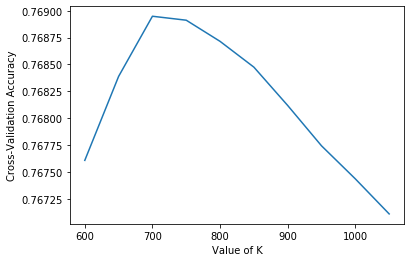

In [34]:
%matplotlib inline 

# plot the k value (x axis) vs the cross-validation accuracy (y axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K')
plt.ylabel('Cross-Validation Accuracy')

In [35]:
# calculate accuracy score using the tuned parameters

knn = KNeighborsClassifier(n_neighbors=700,weights='uniform')
scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy',n_jobs=-1)

print(scores.mean())

# print the 95% confidence interval of the average scores
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

0.76894814398015
Accuracy: 0.77 (+/- 0.28)


### Decision Tree

In [36]:
# import the required packages
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [37]:
# instantiate the DecisionTreeClassifer class with default parameters
dtc = DecisionTreeClassifier(max_depth=10)

# fit the training data to the model
fit = dtc.fit(X_train, y_train)

# create the predictions based on the out of sample data
predictions = dtc.predict(X_test)

In [38]:
# print a confusion matrix of the results
print(confusion_matrix(y_test,predictions))

# print an accuracy score 
print(accuracy_score(y_test,predictions))

[[12937     2     0   232    28     5   238]
 [   19     1    45   161     6     0   164]
 [    9     0  1339   305    24     2  2712]
 [  271    12   128  8802   171    32  1263]
 [   68     4     7   593   343    10   228]
 [   29     3    27   749    37    24   301]
 [  251     2   802   893    30    15 31676]]
0.8480307692307693


In [39]:
# tune the max_depth parameter and test the result using for loop

# instantiate the empty list and assign the range to test
md_scores = []
md_range = range(5,20)

# loop through the values to find the optimal result using cross_val and append to the list
for md in range(5,20):
    dtc = DecisionTreeClassifier(max_depth=md)
    scores = cross_val_score(dtc, X, y, cv=5, scoring='accuracy',n_jobs=-1)
    md_scores.append(scores.mean())

Text(0, 0.5, 'Accuracy Score')

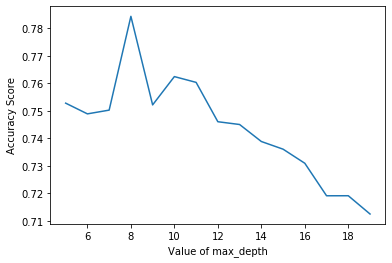

In [40]:
# plot the md value (x axis) vs the accuracy score (y axis)
plt.plot(md_range, md_scores)
plt.xlabel('Value of max_depth')
plt.ylabel('Accuracy Score')

In [41]:
# tune the max_features parameter and test the result

mf_scores = []
mf_range = range(1,4)

for mf in range(1,4):
    dtc = DecisionTreeClassifier(max_features=mf)
    scores = cross_val_score(dtc, X, y, cv=5, scoring='accuracy',n_jobs=-1)
    mf_scores.append(scores.mean())

Text(0, 0.5, 'Accuracy Score')

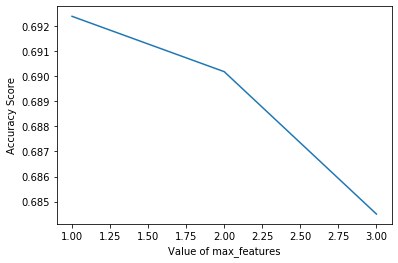

In [42]:
# plot the mf value (x axis) vs the accuracy score (y axis)
plt.plot(mf_range, mf_scores)
plt.xlabel('Value of max_features')
plt.ylabel('Accuracy Score')

In [43]:
# tune the min_samples_split parameter and test the result

mss_scores = []
mss_range = range(100,200,10)

for mss in range(100,200,10):
    dtc = DecisionTreeClassifier(min_samples_split=mss)
    scores = cross_val_score(dtc, X, y, cv=5, scoring='accuracy',n_jobs=-1)
    mss_scores.append(scores.mean())

Text(0, 0.5, 'Accuracy Score')

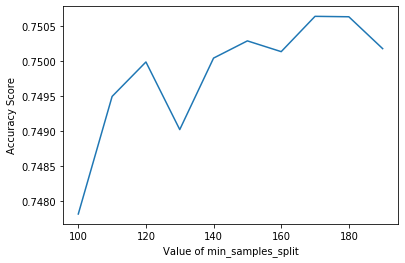

In [44]:
# plot the mss value (x axis) vs the accuracy score (y axis)
plt.plot(mss_range, mss_scores)
plt.xlabel('Value of min_samples_split')
plt.ylabel('Accuracy Score')

In [45]:
# tune the min_samples_leaf parameter and test the result

msl_scores = []
msl_range = range(50,500,20)

for msl in range(50,500,20):
    dtc = DecisionTreeClassifier(min_samples_leaf=msl)
    scores = cross_val_score(dtc, X, y, cv=5, scoring='accuracy',n_jobs=-1)
    msl_scores.append(scores.mean())

Text(0, 0.5, 'Accuracy Score')

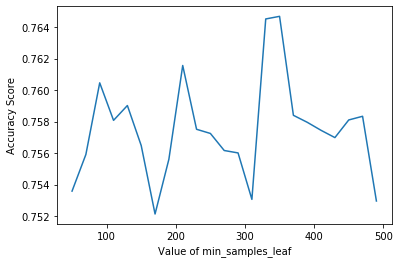

In [46]:
# plot the msl value (x axis) vs the accuracy score (y axis)
plt.plot(msl_range, msl_scores)
plt.xlabel('Value of min_samples_leaf')
plt.ylabel('Accuracy Score')

In [47]:
# calculate accuracy score using the tuned parameters
dtc = DecisionTreeClassifier(max_depth=8,max_features=1,min_samples_split=180,min_samples_leaf=350)
dtc.fit(X,y)
scores = cross_val_score(dtc, X, y, cv=5, scoring='accuracy',n_jobs=-1)

print(scores.mean())

# print the 95% confidence interval of the average scores
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

0.754955197338537
Accuracy: 0.75 (+/- 0.27)


In [48]:
# generate the decision tree visualisation using graphviz
with open('tree.dot', 'w') as f:
    f = tree.export_graphviz(dtc, out_file= f,
                            feature_names=['x','y','z'],
                             class_names=['1','2','3','4','5','6','7'], 
                             filled=True, rounded=True,
                             special_characters=True)

In [49]:
# find the node count of our final model
node_count = dtc.tree_.node_count
print(node_count)

177
